In [ ]:
# import pandas as pd
# import numpy as np
# from numpy.random import RandomState


# # 经营、司法(0.11595)

# raw_data = pd.read_csv("./dataSets/raw_data.csv", encoding="gbk")
# out_data = pd.read_csv("./dataSets/output_data.csv", encoding="gbk")
# # # 竞争风险输出值
# Y = out_data.loc[:,["司法"]]
# y_data = np.array(Y)#np.ndarray()
# # y_list =y_data.tolist()#list
# # Y.head()

In [ ]:
# 绘制误差曲线
# t = np.arange(iteration-1)
# plt.figure(figsize = (9,6))
# plt.plot(t, np.array(error), 'b*')
# plt.xlabel("iteration")
# plt.ylabel("error")
# plt.legend(['error'], loc='upper right')
# plt.show()

# 使用线性回归的方法进行数据曲线拟合
# from sklearn import linear_model
# from sklearn.externals import joblib

# mlr = linear_model.LinearRegression()

# model = mlr.fit(x_train, y_train)
# joblib.dump(model,'rf.model')

# print(mlr)
# print ("coef:")
# print(mlr.coef_)
# print ("intercept")
# print( mlr.intercept_)

# #xPredict =  x_test[0].tolist()
# # # xPredict
# yPredict = mlr.predict(x_test)
# # # # print "predict:"
# print(yPredict)


In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn import preprocessing
# from tensorflow.python.framework import graph_util



# # 竞争风险输入指标2;经营力：6
# #col_n = ['对外投资数量','竞品信息']
# #col_n = ['经营力方面---财务风险-盈利能力-销售净利率','财务风险-盈利能力-总资产报酬率', '财务风险-盈利能力-净资产收益率','财务风险-资产利用-存货周转率'
# #        ,'财务风险-资产利用-总资产周转率', '财务风险-资产利用-成本费用利润率']

# col_n = ["司法方面---经营风险-司法风险-诉讼数量","经营风险-其它风险-经营异常次数","经营风险-其它风险-行政处罚次数","经营风险-其它风险-动产质押次数","经营风险-其它风险-自身风险","经营风险-其它风险-周边风险"]
# competition = raw_data.loc[:, col_n].values
# #x_3 =  competition[:,3:6]

# #x=np.column_stack([competition,x_3])#随意给x增加了3列，x变为16列，可以reshape为3*3矩阵了 没啥用，就是凑个正方形


# # .replace([0, 0],[4,5]
# x_train, x_test, y_train, y_test = train_test_split(
#     x, y_data, train_size=0.8, random_state=123) # 参数test_size设置训练集占比


In [1]:
import tensorflow as tf
import tensorflow_transform as tft
import  os

os.environ["CUDA_VISIBLE_DEVICES"] = "1"
print("tensorflow运行版本：" + tf.__version__)
# CNN 回归预测
sess = tf.Session()
#变厚矩阵
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial, name="w")
#偏置
def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial, name="b")

#卷积处理 变厚过程
def conv2d(x, W):
    
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')
#pool 长宽缩小一倍
def max_pool_2x2(x):
    # stride [1, x_movement, y_movement, 1]
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')


# define placeholder for inputs to network
xs = tf.placeholder("float", shape=[None, 6], name = 'input_x') #原始数据的维度：9
ys = tf.placeholder("float", shape=[None, 1])#输出数据为维度：1
 
#keep_prob = tf.placeholder(tf.float32)#dropout的比例
 
x_image = tf.reshape(xs, [-1, 2, 3, 1])#原始数据16变成二维图片4*4
## conv1 layer ##第一卷积层
W_conv1 = weight_variable([2,2,1,16]) # patch 2x2, in size 1, out size 32,每个像素变成32个像素，就是变厚的过程
b_conv1 = bias_variable([16])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1) # output size 2x2x32，长宽不变，高度为32的三维图像
#h_pool1 = max_pool_2x2(h_conv1)     # output size 2x2x32 长宽缩小一倍


## conv2 layer ##第二卷积层
W_conv2 = weight_variable([2,2, 16, 32]) # patch 2x2, in size 32, out size 64
b_conv2 = bias_variable([32])
h_conv2 = tf.nn.relu(conv2d(h_conv1, W_conv2) + b_conv2) #输入第一层的处理结果 输出shape 4*4*64
 
## fc1 layer ##  full connection 全连接层
W_fc1 = weight_variable([2*3*32, 128]) #3x3 ，高度为64的三维图片，然后把它拉成512长的一维数组
b_fc1 = bias_variable([128])
 
h_pool2_flat = tf.reshape(h_conv2, [-1, 2*3*32]) #把4*4，高度为64的三维图片拉成一维数组 降维处理
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
h_fc1_drop = h_fc1 #把数组中扔掉比例为keep_prob的元素
## fc2 layer ## full connection

with tf.name_scope('output'):
    W_fc2 = weight_variable([128, 1]) #512长的一维数组压缩为长度为1的数组
    b_fc2 = bias_variable([1]) #偏置
    #最后的计算结果
    multi= tf.matmul(h_fc1_drop, W_fc2 ) + b_fc2
    pred = tf.add(multi, b_fc2, name="predict")

# 计算 predition与y 差距 所用方法很简单就是用 suare()平方,sum()求和,mean()平均值
cross_entropy = tf.reduce_mean(tf.reduce_sum(tf.square(ys - pred), reduction_indices=[1]))
# 0.01学习效率,minimize(loss)减小loss误差
train_step = tf.train.AdamOptimizer(0.0020).minimize(cross_entropy)
sess.run(tf.global_variables_initializer())

tensorflow运行版本：1.3.0


In [2]:
from functools import reduce
def pingjun(L=[]):
    a=reduce(lambda x,y:x+y,L)
    return a*1.0/len(L)
#获取平均数
def Get_Average(list):
   sum = 0
   for item in list:     
      sum += item  
   return sum/len(list)
 

In [3]:
# 训练模型
def train_model(x_train, y_train, iteration, model_name):
    error = []
    for i in range(iteration):
        sess.run(train_step, feed_dict={xs: x_train, ys: y_train})   
        err =  sess.run(cross_entropy, feed_dict={xs: x_train, ys: y_train})
        print(i, '误差=',err)  # 输出loss值
        error.append(err) 
    # 计算平均误差
    ave_error = Get_Average(error)
    print("平均误差为：%f " % ave_error)   
    # 保存模型
    output_graph_def = tf.graph_util.convert_variables_to_constants(sess, sess.graph_def, output_node_names=['output/predict'])
    with tf.gfile.FastGFile(model_name, mode='wb') as f:
        f.write(output_graph_def.SerializeToString())
        print("Model Save succesfull!")

In [4]:
import pandas as pd
import numpy as np
import xlrd as xd
from numpy.random import RandomState
import  os

# 依次建立成长力、筹资力、流动性、清偿力四大财务风险指标；20180823午
# 加载全部数据包括四个模型数据,数据预处理
load_data = pd.read_excel("./dataSets/DEA三级到二级.xlsx", encoding="gbk")
raw_data  = load_data.fillna(0)
col_cz  = ["营业收入增长率","总资产增长率","净资产收益率","总资本盈利率","现金收入比","购建固定资产及无形资产和其他长期资产支付的现金（"]
col_czi = ["纳税信用等级","财务费用率","产权比率","速动比率","现金比率","现金流量债务比"]
col_ld  = ["流动资产周转率","应收账款周转率","流动资产合计","非流动资产合计","流动负债合计","营运资本周转率"]
col_qc  = ["流动资产","流动负债","资产总计","净利润","所得税","经营现金流量净额"]
# 各指标特征
CZ_features  =  raw_data.loc[:, col_cz]
CZI_features =  raw_data.loc[:, col_czi]
LD_features  =  raw_data.loc[:, col_ld]
QC_features  =  raw_data.loc[:, col_qc]
# 各指标 输出
CZ_y  = raw_data.loc[:,["成长力"]]
CZI_y = raw_data.loc[:,["筹资力"]]
LD_y  = raw_data.loc[:,["流动性"]]
QC_y  = raw_data.loc[:,["清偿力"]]

In [5]:
# 切分训练测试数据
from sklearn.model_selection import train_test_split
def split_x_y(x,y_data):
#     x_3 = x[:,3:6]
#     x_=np.column_stack([x,x_3])#随意给x增加了3列，x变为16列，可以reshape为3*3矩阵正方形
    x_train, x_test, y_train, y_test = train_test_split(
    x, y_data, train_size=0.7, random_state=123) # 参数test_size设置训练集占比
    return x_train, x_test, y_train, y_test

In [6]:
# 成长力数据切分
from sklearn import preprocessing
inputs_x = LD_features.values
output_y = LD_y.values
x_train, x_test, y_train, y_test = split_x_y(inputs_x, output_y)
x_test

/home/lihanghang/anaconda3/envs/TensorFlow/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


array([[  2.39284496e+00,   3.90242011e+00,   1.81712400e+04,
          2.21065000e+03,   9.98501000e+03,   4.72361147e+00],
       [  0.00000000e+00,   0.00000000e+00,   2.24910000e+03,
          1.89265000e+03,   7.43020000e+02,   6.19887390e-02],
       [  6.98043060e-02,   2.45858581e-01,   1.91779000e+03,
          1.01100000e+01,   7.01970000e+02,   0.00000000e+00],
       ..., 
       [  2.76325337e+00,   5.95986453e+00,   5.86830000e+02,
          1.33000000e+00,   2.30480000e+02,   3.64038154e+00],
       [  6.02597461e-01,   2.22751407e+00,   3.00616600e+04,
          1.49561300e+04,   2.16339500e+04,   1.53668553e+00],
       [  1.45635295e+00,   9.89421560e+00,   1.06822800e+04,
          1.07751730e+05,   1.96579600e+04,  -6.79402564e-01]])

In [13]:
# 该类的好处在于可以保存训练集中的参数（均值、方差）直接使用其对象转换测试集数据
ss_x = preprocessing.StandardScaler()
# 先拟合再标准化训练集数据
train_x_disorder = ss_x.fit_transform(x_train)
# 使用上面所得均值和方差直接归一化测试集数据
test_x_disorder = ss_x.transform(x_test)
print(test_x_disorder)
ss_y = preprocessing.StandardScaler()
train_y_disorder = ss_y.fit_transform(y_train.reshape(-1, 1))
test_y_disorder = ss_y.transform(y_test.reshape(-1, 1))
#print(test_y_disorder)

t = ss_x.fit(x_train)
print(t.mean_)
t.scale_

[[-0.02952017 -0.04773391 -0.11562858 -0.10468701 -0.1112044  -0.04272616]
 [-0.05588905 -0.04773391 -0.1160628  -0.10471611 -0.11159495 -0.04614258]
 [-0.05511981 -0.04773391 -0.11607184 -0.10488832 -0.11159668 -0.04618801]
 ..., 
 [-0.02543831 -0.04773391 -0.11610813 -0.10488912 -0.11161661 -0.04352004]
 [-0.04924849 -0.04773391 -0.11530431 -0.10352106 -0.11071214 -0.0450618 ]
 [-0.0398402  -0.04773391 -0.11583282 -0.09503211 -0.11079564 -0.04668593]]
[ 0.45940415]


array([ 0.20825167])

In [8]:
# 训练
train_model(train_x_disorder,train_y_disorder , 20000, "./Model/LD_Model.pb")

0 误差= 1.08416
1 误差= 1.00701
2 误差= 1.0068
3 误差= 1.03301
4 误差= 1.02301
5 误差= 1.00187
6 误差= 0.995424
7 误差= 1.00396
8 误差= 1.01138
9 误差= 1.00893
10 误差= 1.00096
11 误差= 0.995363
12 误差= 0.995397
13 误差= 0.998822
14 误差= 1.0016
15 误差= 1.00119
16 误差= 0.998202
17 误差= 0.995061
18 误差= 0.99433
19 误差= 0.995646
20 误差= 0.99723
21 误差= 0.997504
22 误差= 0.996354
23 误差= 0.994794
24 误差= 0.993944
25 误差= 0.994159
26 误差= 0.994938
27 误差= 0.995438
28 误差= 0.995238
29 误差= 0.99452
30 误差= 0.993836
31 误差= 0.993617
32 误差= 0.993869
33 误差= 0.994224
34 误差= 0.994301
35 误差= 0.994014
36 误差= 0.993594
37 误差= 0.993296
38 误差= 0.993299
39 误差= 0.993466
40 误差= 0.993563
41 误差= 0.993458
42 误差= 0.993212
43 误差= 0.992998
44 误差= 0.992928
45 误差= 0.992977
46 误差= 0.993023
47 误差= 0.992966
48 误差= 0.992819
49 误差= 0.992669
50 误差= 0.992596
51 误差= 0.992598
52 误差= 0.992602
53 误差= 0.992551
54 误差= 0.992445
55 误差= 0.992337
56 误差= 0.992272
57 误差= 0.992248
58 误差= 0.992222
59 误差= 0.992161
60 误差= 0.992078
61 误差= 0.991997
62 误差= 0.991942
63 误差= 0.991901
64 

496 误差= 0.767294
497 误差= 0.767942
498 误差= 0.767876
499 误差= 0.765282
500 误差= 0.763078
501 误差= 0.763832
502 误差= 0.766517
503 误差= 0.769171
504 误差= 0.766938
505 误差= 0.762933
506 误差= 0.760964
507 误差= 0.761904
508 误差= 0.76566
509 误差= 0.767679
510 误差= 0.768071
511 误差= 0.76281
512 误差= 0.760185
513 误差= 0.763699
514 误差= 0.770637
515 误差= 0.781665
516 误差= 0.775914
517 误差= 0.762252
518 误差= 0.760909
519 误差= 0.770937
520 误差= 0.772708
521 误差= 0.760722
522 误差= 0.759956
523 误差= 0.766962
524 误差= 0.76285
525 误差= 0.757425
526 误差= 0.758934
527 误差= 0.763013
528 误差= 0.767335
529 误差= 0.761476
530 误差= 0.757245
531 误差= 0.758091
532 误差= 0.757633
533 误差= 0.755341
534 误差= 0.7553
535 误差= 0.753551
536 误差= 0.752995
537 误差= 0.753998
538 误差= 0.753899
539 误差= 0.752041
540 误差= 0.750102
541 误差= 0.75083
542 误差= 0.752006
543 误差= 0.750826
544 误差= 0.748988
545 误差= 0.748645
546 误差= 0.749521
547 误差= 0.749525
548 误差= 0.749449
549 误差= 0.74954
550 误差= 0.749561
551 误差= 0.74765
552 误差= 0.746079
553 误差= 0.746048
554 误差= 0.746592
555 误

988 误差= 0.651294
989 误差= 0.666481
990 误差= 0.656453
991 误差= 0.648105
992 误差= 0.637886
993 误差= 0.644653
994 误差= 0.653657
995 误差= 0.64672
996 误差= 0.643012
997 误差= 0.636345
998 误差= 0.63371
999 误差= 0.634727
1000 误差= 0.638612
1001 误差= 0.64602
1002 误差= 0.650837
1003 误差= 0.661883
1004 误差= 0.652561
1005 误差= 0.641903
1006 误差= 0.633226
1007 误差= 0.636934
1008 误差= 0.653334
1009 误差= 0.668542
1010 误差= 0.716594
1011 误差= 0.677433
1012 误差= 0.640306
1013 误差= 0.662168
1014 误差= 0.665845
1015 误差= 0.647997
1016 误差= 0.638512
1017 误差= 0.656472
1018 误差= 0.693039
1019 误差= 0.672962
1020 误差= 0.647507
1021 误差= 0.637889
1022 误差= 0.649868
1023 误差= 0.656863
1024 误差= 0.641742
1025 误差= 0.635768
1026 误差= 0.646692
1027 误差= 0.65616
1028 误差= 0.659132
1029 误差= 0.639254
1030 误差= 0.63237
1031 误差= 0.642959
1032 误差= 0.649256
1033 误差= 0.651921
1034 误差= 0.639974
1035 误差= 0.631349
1036 误差= 0.628964
1037 误差= 0.634302
1038 误差= 0.641155
1039 误差= 0.636071
1040 误差= 0.629928
1041 误差= 0.626996
1042 误差= 0.629159
1043 误差= 0.636041
1044 误差= 

1448 误差= 0.574993
1449 误差= 0.567582
1450 误差= 0.567338
1451 误差= 0.566995
1452 误差= 0.566931
1453 误差= 0.570753
1454 误差= 0.56983
1455 误差= 0.570439
1456 误差= 0.570483
1457 误差= 0.567743
1458 误差= 0.567901
1459 误差= 0.565514
1460 误差= 0.563811
1461 误差= 0.563297
1462 误差= 0.561419
1463 误差= 0.561707
1464 误差= 0.561417
1465 误差= 0.561309
1466 误差= 0.562556
1467 误差= 0.563894
1468 误差= 0.568421
1469 误差= 0.580941
1470 误差= 0.603395
1471 误差= 0.67596
1472 误差= 0.692751
1473 误差= 0.651629
1474 误差= 0.576504
1475 误差= 0.594033
1476 误差= 0.646531
1477 误差= 0.606299
1478 误差= 0.570469
1479 误差= 0.585432
1480 误差= 0.601636
1481 误差= 0.591016
1482 误差= 0.565722
1483 误差= 0.574659
1484 误差= 0.596036
1485 误差= 0.589179
1486 误差= 0.572757
1487 误差= 0.561462
1488 误差= 0.568313
1489 误差= 0.584074
1490 误差= 0.589187
1491 误差= 0.583039
1492 误差= 0.567685
1493 误差= 0.56011
1494 误差= 0.564546
1495 误差= 0.572489
1496 误差= 0.575198
1497 误差= 0.568924
1498 误差= 0.561066
1499 误差= 0.558065
1500 误差= 0.561313
1501 误差= 0.565793
1502 误差= 0.566649
1503 误差= 0.56

1941 误差= 0.538606
1942 误差= 0.526445
1943 误差= 0.516582
1944 误差= 0.507921
1945 误差= 0.51286
1946 误差= 0.520519
1947 误差= 0.526708
1948 误差= 0.530995
1949 误差= 0.529928
1950 误差= 0.525303
1951 误差= 0.518505
1952 误差= 0.511846
1953 误差= 0.507457
1954 误差= 0.507525
1955 误差= 0.510779
1956 误差= 0.514618
1957 误差= 0.520518
1958 误差= 0.526316
1959 误差= 0.534351
1960 误差= 0.555874
1961 误差= 0.572048
1962 误差= 0.578207
1963 误差= 0.556757
1964 误差= 0.530239
1965 误差= 0.509669
1966 误差= 0.507931
1967 误差= 0.52243
1968 误差= 0.539117
1969 误差= 0.550276
1970 误差= 0.546318
1971 误差= 0.537896
1972 误差= 0.523145
1973 误差= 0.511104
1974 误差= 0.50539
1975 误差= 0.506281
1976 误差= 0.51121
1977 误差= 0.518305
1978 误差= 0.525858
1979 误差= 0.531886
1980 误差= 0.537645
1981 误差= 0.539737
1982 误差= 0.540552
1983 误差= 0.532646
1984 误差= 0.5202
1985 误差= 0.508425
1986 误差= 0.503132
1987 误差= 0.505819
1988 误差= 0.513315
1989 误差= 0.522362
1990 误差= 0.533725
1991 误差= 0.553403
1992 误差= 0.571547
1993 误差= 0.595764
1994 误差= 0.583894
1995 误差= 0.553124
1996 误差= 0.51531

2419 误差= 0.516306
2420 误差= 0.520181
2421 误差= 0.51462
2422 误差= 0.502967
2423 误差= 0.487235
2424 误差= 0.473794
2425 误差= 0.468087
2426 误差= 0.470957
2427 误差= 0.479198
2428 误差= 0.489105
2429 误差= 0.499616
2430 误差= 0.509326
2431 误差= 0.522115
2432 误差= 0.53039
2433 误差= 0.537758
2434 误差= 0.530468
2435 误差= 0.515994
2436 误差= 0.490861
2437 误差= 0.471857
2438 误差= 0.470179
2439 误差= 0.482368
2440 误差= 0.495822
2441 误差= 0.500631
2442 误差= 0.497135
2443 误差= 0.486586
2444 误差= 0.476245
2445 误差= 0.468617
2446 误差= 0.466438
2447 误差= 0.469371
2448 误差= 0.475621
2449 误差= 0.483274
2450 误差= 0.4918
2451 误差= 0.501988
2452 误差= 0.511976
2453 误差= 0.523108
2454 误差= 0.522808
2455 误差= 0.522669
2456 误差= 0.506497
2457 误差= 0.48551
2458 误差= 0.468989
2459 误差= 0.46562
2460 误差= 0.474727
2461 误差= 0.491489
2462 误差= 0.514148
2463 误差= 0.541166
2464 误差= 0.588009
2465 误差= 0.619763
2466 误差= 0.656997
2467 误差= 0.607559
2468 误差= 0.533037
2469 误差= 0.473465
2470 误差= 0.495172
2471 误差= 0.53472
2472 误差= 0.505687
2473 误差= 0.473509
2474 误差= 0.494121

2885 误差= 0.473219
2886 误差= 0.46478
2887 误差= 0.452911
2888 误差= 0.441907
2889 误差= 0.437795
2890 误差= 0.44155
2891 误差= 0.448635
2892 误差= 0.454967
2893 误差= 0.458112
2894 误差= 0.460144
2895 误差= 0.457313
2896 误差= 0.452546
2897 误差= 0.445665
2898 误差= 0.440452
2899 误差= 0.436404
2900 误差= 0.435033
2901 误差= 0.436404
2902 误差= 0.439548
2903 误差= 0.443542
2904 误差= 0.447663
2905 误差= 0.453281
2906 误差= 0.457387
2907 误差= 0.462275
2908 误差= 0.46482
2909 误差= 0.467799
2910 误差= 0.466313
2911 误差= 0.465301
2912 误差= 0.460543
2913 误差= 0.456209
2914 误差= 0.451056
2915 误差= 0.447624
2916 误差= 0.444598
2917 误差= 0.442851
2918 误差= 0.441433
2919 误差= 0.440692
2920 误差= 0.440224
2921 误差= 0.440223
2922 误差= 0.440186
2923 误差= 0.441013
2924 误差= 0.442508
2925 误差= 0.446711
2926 误差= 0.454827
2927 误差= 0.474144
2928 误差= 0.508003
2929 误差= 0.5886
2930 误差= 0.71449
2931 误差= 0.940647
2932 误差= 1.01581
2933 误差= 0.893989
2934 误差= 0.537969
2935 误差= 0.503861
2936 误差= 0.682361
2937 误差= 0.575696
2938 误差= 0.504753
2939 误差= 0.562054
2940 误差= 0.513013

3377 误差= 0.441528
3378 误差= 0.415662
3379 误差= 0.4113
3380 误差= 0.425339
3381 误差= 0.446105
3382 误差= 0.460159
3383 误差= 0.477744
3384 误差= 0.478687
3385 误差= 0.478141
3386 误差= 0.461065
3387 误差= 0.440856
3388 误差= 0.419732
3389 误差= 0.409268
3390 误差= 0.411342
3391 误差= 0.421447
3392 误差= 0.434078
3393 误差= 0.442882
3394 误差= 0.455034
3395 误差= 0.459097
3396 误差= 0.467064
3397 误差= 0.461041
3398 误差= 0.450416
3399 误差= 0.430647
3400 误差= 0.415407
3401 误差= 0.40755
3402 误差= 0.408598
3403 误差= 0.416524
3404 误差= 0.427978
3405 误差= 0.447756
3406 误差= 0.468031
3407 误差= 0.496538
3408 误差= 0.504196
3409 误差= 0.501576
3410 误差= 0.471825
3411 误差= 0.440671
3412 误差= 0.415063
3413 误差= 0.406937
3414 误差= 0.415425
3415 误差= 0.434497
3416 误差= 0.462434
3417 误差= 0.488218
3418 误差= 0.525735
3419 误差= 0.533603
3420 误差= 0.524196
3421 误差= 0.475239
3422 误差= 0.430198
3423 误差= 0.408722
3424 误差= 0.420332
3425 误差= 0.448821
3426 误差= 0.471755
3427 误差= 0.494998
3428 误差= 0.491397
3429 误差= 0.482844
3430 误差= 0.45433
3431 误差= 0.426253
3432 误差= 0.408

3851 误差= 0.439219
3852 误差= 0.453356
3853 误差= 0.477083
3854 误差= 0.48061
3855 误差= 0.476609
3856 误差= 0.448642
3857 误差= 0.420777
3858 误差= 0.395506
3859 误差= 0.384599
3860 误差= 0.388245
3861 误差= 0.401243
3862 误差= 0.419434
3863 误差= 0.435128
3864 误差= 0.455633
3865 误差= 0.46173
3866 误差= 0.465976
3867 误差= 0.447511
3868 误差= 0.425302
3869 误差= 0.399982
3870 误差= 0.385877
3871 误差= 0.385362
3872 误差= 0.395286
3873 误差= 0.412191
3874 误差= 0.430364
3875 误差= 0.45598
3876 误差= 0.473755
3877 误差= 0.504268
3878 误差= 0.504923
3879 误差= 0.493798
3880 误差= 0.451051
3881 误差= 0.411308
3882 误差= 0.387106
3883 误差= 0.387455
3884 误差= 0.404868
3885 误差= 0.426571
3886 误差= 0.449532
3887 误差= 0.456564
3888 误差= 0.462722
3889 误差= 0.447535
3890 误差= 0.428347
3891 误差= 0.403367
3892 误差= 0.387115
3893 误差= 0.383406
3894 误差= 0.39147
3895 误差= 0.40491
3896 误差= 0.414757
3897 误差= 0.42364
3898 误差= 0.423709
3899 误差= 0.423112
3900 误差= 0.414558
3901 误差= 0.405677
3902 误差= 0.394746
3903 误差= 0.386923
3904 误差= 0.382224
3905 误差= 0.381292
3906 误差= 0.38326

4315 误差= 0.460013
4316 误差= 0.463832
4317 误差= 0.462345
4318 误差= 0.436389
4319 误差= 0.409519
4320 误差= 0.381782
4321 误差= 0.36702
4322 误差= 0.367398
4323 误差= 0.379071
4324 误差= 0.397642
4325 误差= 0.41667
4326 误差= 0.441671
4327 误差= 0.455799
4328 误差= 0.47156
4329 误差= 0.45979
4330 误差= 0.437634
4331 误差= 0.402009
4332 误差= 0.375412
4333 误差= 0.365468
4334 误差= 0.372409
4335 误差= 0.38913
4336 误差= 0.407443
4337 误差= 0.426909
4338 误差= 0.437296
4339 误差= 0.452152
4340 误差= 0.447711
4341 误差= 0.43962
4342 误差= 0.41418
4343 误差= 0.389219
4344 误差= 0.370491
4345 误差= 0.365188
4346 误差= 0.371089
4347 误差= 0.383464
4348 误差= 0.397474
4349 误差= 0.408709
4350 误差= 0.42089
4351 误差= 0.425244
4352 误差= 0.433189
4353 误差= 0.427069
4354 误差= 0.419109
4355 误差= 0.400718
4356 误差= 0.384419
4357 误差= 0.370196
4358 误差= 0.363652
4359 误差= 0.363887
4360 误差= 0.369038
4361 误差= 0.377747
4362 误差= 0.386966
4363 误差= 0.398929
4364 误差= 0.407606
4365 误差= 0.418636
4366 误差= 0.420446
4367 误差= 0.422783
4368 误差= 0.413092
4369 误差= 0.402631
4370 误差= 0.386835


4790 误差= 0.357298
4791 误差= 0.358203
4792 误差= 0.359272
4793 误差= 0.361558
4794 误差= 0.364572
4795 误差= 0.369498
4796 误差= 0.374663
4797 误差= 0.38364
4798 误差= 0.391198
4799 误差= 0.402429
4800 误差= 0.409046
4801 误差= 0.416571
4802 误差= 0.414688
4803 误差= 0.413965
4804 误差= 0.403189
4805 误差= 0.393512
4806 误差= 0.379729
4807 误差= 0.368645
4808 误差= 0.359474
4809 误差= 0.35375
4810 误差= 0.351105
4811 误差= 0.350401
4812 误差= 0.351172
4813 误差= 0.353281
4814 误差= 0.356895
4815 误差= 0.362089
4816 误差= 0.370632
4817 误差= 0.38139
4818 误差= 0.40092
4819 误差= 0.420122
4820 误差= 0.447125
4821 误差= 0.458862
4822 误差= 0.461866
4823 误差= 0.440424
4824 误差= 0.412461
4825 误差= 0.380696
4826 误差= 0.359492
4827 误差= 0.351128
4828 误差= 0.354078
4829 误差= 0.365401
4830 误差= 0.382184
4831 误差= 0.406539
4832 误差= 0.427408
4833 误差= 0.448884
4834 误差= 0.445977
4835 误差= 0.430356
4836 误差= 0.396971
4837 误差= 0.369886
4838 误差= 0.352937
4839 误差= 0.350633
4840 误差= 0.361486
4841 误差= 0.381094
4842 误差= 0.409967
4843 误差= 0.442791
4844 误差= 0.494299
4845 误差= 0.527

5268 误差= 0.448537
5269 误差= 0.483109
5270 误差= 0.515567
5271 误差= 0.518636
5272 误差= 0.499783
5273 误差= 0.452241
5274 误差= 0.399268
5275 误差= 0.355724
5276 误差= 0.336354
5277 误差= 0.341757
5278 误差= 0.363821
5279 误差= 0.395033
5280 误差= 0.423787
5281 误差= 0.448864
5282 误差= 0.446628
5283 误差= 0.431262
5284 误差= 0.39628
5285 误差= 0.363267
5286 误差= 0.340199
5287 误差= 0.335782
5288 误差= 0.347405
5289 误差= 0.368368
5290 误差= 0.395867
5291 误差= 0.418557
5292 误差= 0.438145
5293 误差= 0.440455
5294 误差= 0.424905
5295 误差= 0.391567
5296 误差= 0.359258
5297 误差= 0.338268
5298 误差= 0.335731
5299 误差= 0.347753
5300 误差= 0.36717
5301 误差= 0.391283
5302 误差= 0.412702
5303 误差= 0.433542
5304 误差= 0.433864
5305 误差= 0.419191
5306 误差= 0.385952
5307 误差= 0.355716
5308 误差= 0.337178
5309 误差= 0.335671
5310 误差= 0.346827
5311 误差= 0.367283
5312 误差= 0.400174
5313 误差= 0.431895
5314 误差= 0.458168
5315 误差= 0.454695
5316 误差= 0.432445
5317 误差= 0.390247
5318 误差= 0.353688
5319 误差= 0.335606
5320 误差= 0.340641
5321 误差= 0.361945
5322 误差= 0.386348
5323 误差= 0.4

5742 误差= 0.336208
5743 误差= 0.350938
5744 误差= 0.374596
5745 误差= 0.412472
5746 误差= 0.452359
5747 误差= 0.502005
5748 误差= 0.527372
5749 误差= 0.541758
5750 误差= 0.509199
5751 误差= 0.457959
5752 误差= 0.390823
5753 误差= 0.340887
5754 误差= 0.322086
5755 误差= 0.334792
5756 误差= 0.368044
5757 误差= 0.407201
5758 误差= 0.446196
5759 误差= 0.456618
5760 误差= 0.453004
5761 误差= 0.406692
5762 误差= 0.358864
5763 误差= 0.326883
5764 误差= 0.328968
5765 误差= 0.354301
5766 误差= 0.380715
5767 误差= 0.403591
5768 误差= 0.39757
5769 误差= 0.370872
5770 误差= 0.337976
5771 误差= 0.322333
5772 误差= 0.327667
5773 误差= 0.346674
5774 误差= 0.373933
5775 误差= 0.396696
5776 误差= 0.415402
5777 误差= 0.415308
5778 误差= 0.405874
5779 误差= 0.379887
5780 误差= 0.352385
5781 误差= 0.331279
5782 误差= 0.321229
5783 误差= 0.321974
5784 误差= 0.330901
5785 误差= 0.352602
5786 误差= 0.385569
5787 误差= 0.419171
5788 误差= 0.43942
5789 误差= 0.446989
5790 误差= 0.429731
5791 误差= 0.397071
5792 误差= 0.358017
5793 误差= 0.331304
5794 误差= 0.320852
5795 误差= 0.323066
5796 误差= 0.333029
5797 误差= 0.3

6202 误差= 0.333304
6203 误差= 0.390476
6204 误差= 0.408798
6205 误差= 0.367361
6206 误差= 0.324282
6207 误差= 0.335053
6208 误差= 0.369087
6209 误差= 0.360522
6210 误差= 0.330848
6211 误差= 0.322272
6212 误差= 0.342114
6213 误差= 0.356612
6214 误差= 0.341793
6215 误差= 0.32281
6216 误差= 0.318944
6217 误差= 0.329377
6218 误差= 0.338294
6219 误差= 0.335352
6220 误差= 0.326724
6221 误差= 0.319072
6222 误差= 0.315707
6223 误差= 0.316753
6224 误差= 0.321106
6225 误差= 0.328098
6226 误差= 0.332737
6227 误差= 0.334094
6228 误差= 0.330833
6229 误差= 0.325818
6230 误差= 0.320548
6231 误差= 0.316945
6232 误差= 0.314426
6233 误差= 0.313905
6234 误差= 0.312337
6235 误差= 0.31308
6236 误差= 0.318035
6237 误差= 0.325484
6238 误差= 0.341743
6239 误差= 0.361333
6240 误差= 0.390902
6241 误差= 0.406083
6242 误差= 0.412582
6243 误差= 0.390113
6244 误差= 0.357341
6245 误差= 0.327553
6246 误差= 0.313335
6247 误差= 0.31514
6248 误差= 0.330856
6249 误差= 0.366923
6250 误差= 0.415646
6251 误差= 0.487788
6252 误差= 0.508201
6253 误差= 0.47374
6254 误差= 0.381978
6255 误差= 0.321934
6256 误差= 0.329638
6257 误差= 0.374

6695 误差= 0.390476
6696 误差= 0.348973
6697 误差= 0.316116
6698 误差= 0.303706
6699 误差= 0.311942
6700 误差= 0.338001
6701 误差= 0.371685
6702 误差= 0.409821
6703 误差= 0.41531
6704 误差= 0.399776
6705 误差= 0.352523
6706 误差= 0.316264
6707 误差= 0.304512
6708 误差= 0.31888
6709 误差= 0.342698
6710 误差= 0.351544
6711 误差= 0.344172
6712 误差= 0.32349
6713 误差= 0.307318
6714 误差= 0.303794
6715 误差= 0.311934
6716 误差= 0.324009
6717 误差= 0.328364
6718 误差= 0.326721
6719 误差= 0.317371
6720 误差= 0.308893
6721 误差= 0.303251
6722 误差= 0.302304
6723 误差= 0.305068
6724 误差= 0.310512
6725 误差= 0.320384
6726 误差= 0.332347
6727 误差= 0.352671
6728 误差= 0.367559
6729 误差= 0.382407
6730 误差= 0.377105
6731 误差= 0.365747
6732 误差= 0.342907
6733 误差= 0.322281
6734 误差= 0.307398
6735 误差= 0.301801
6736 误差= 0.304686
6737 误差= 0.314366
6738 误差= 0.332681
6739 误差= 0.353137
6740 误差= 0.375384
6741 误差= 0.380585
6742 误差= 0.386887
6743 误差= 0.367729
6744 误差= 0.34491
6745 误差= 0.317692
6746 误差= 0.303247
6747 误差= 0.304457
6748 误差= 0.316584
6749 误差= 0.333401
6750 误差= 0.343

7164 误差= 0.383241
7165 误差= 0.378688
7166 误差= 0.348319
7167 误差= 0.317685
7168 误差= 0.298725
7169 误差= 0.300812
7170 误差= 0.316726
7171 误差= 0.329888
7172 误差= 0.327358
7173 误差= 0.31235
7174 误差= 0.299377
7175 误差= 0.297015
7176 误差= 0.303926
7177 误差= 0.314215
7178 误差= 0.318368
7179 误差= 0.316062
7180 误差= 0.308356
7181 误差= 0.301067
7182 误差= 0.296303
7183 误差= 0.2955
7184 误差= 0.298039
7185 误差= 0.302929
7186 误差= 0.31042
7187 误差= 0.31819
7188 误差= 0.328582
7189 误差= 0.334957
7190 误差= 0.341061
7191 误差= 0.342873
7192 误差= 0.346414
7193 误差= 0.34642
7194 误差= 0.351733
7195 误差= 0.352491
7196 误差= 0.357157
7197 误差= 0.352283
7198 误差= 0.343082
7199 误差= 0.326966
7200 误差= 0.312155
7201 误差= 0.300516
7202 误差= 0.294885
7203 误差= 0.294872
7204 误差= 0.298403
7205 误差= 0.30365
7206 误差= 0.309854
7207 误差= 0.318734
7208 误差= 0.329472
7209 误差= 0.351472
7210 误差= 0.37965
7211 误差= 0.427806
7212 误差= 0.461376
7213 误差= 0.495756
7214 误差= 0.458661
7215 误差= 0.385599
7216 误差= 0.313368
7217 误差= 0.303224
7218 误差= 0.345167
7219 误差= 0.365266


7627 误差= 0.349429
7628 误差= 0.329976
7629 误差= 0.309039
7630 误差= 0.305813
7631 误差= 0.318925
7632 误差= 0.330626
7633 误差= 0.328431
7634 误差= 0.316286
7635 误差= 0.306671
7636 误差= 0.305393
7637 误差= 0.310382
7638 误差= 0.317029
7639 误差= 0.32199
7640 误差= 0.328689
7641 误差= 0.327533
7642 误差= 0.317365
7643 误差= 0.307238
7644 误差= 0.305
7645 误差= 0.309838
7646 误差= 0.316443
7647 误差= 0.324001
7648 误差= 0.326832
7649 误差= 0.322315
7650 误差= 0.314115
7651 误差= 0.306796
7652 误差= 0.302299
7653 误差= 0.302405
7654 误差= 0.305496
7655 误差= 0.308388
7656 误差= 0.309216
7657 误差= 0.308052
7658 误差= 0.306828
7659 误差= 0.306054
7660 误差= 0.306726
7661 误差= 0.307698
7662 误差= 0.310908
7663 误差= 0.315838
7664 误差= 0.324894
7665 误差= 0.332334
7666 误差= 0.340387
7667 误差= 0.341617
7668 误差= 0.341592
7669 误差= 0.334748
7670 误差= 0.328532
7671 误差= 0.319565
7672 误差= 0.313273
7673 误差= 0.30779
7674 误差= 0.304243
7675 误差= 0.302882
7676 误差= 0.30381
7677 误差= 0.306571
7678 误差= 0.312272
7679 误差= 0.322506
7680 误差= 0.348414
7681 误差= 0.388041
7682 误差= 0.45831

8108 误差= 0.289446
8109 误差= 0.289447
8110 误差= 0.28943
8111 误差= 0.289426
8112 误差= 0.289422
8113 误差= 0.289528
8114 误差= 0.289939
8115 误差= 0.290712
8116 误差= 0.292151
8117 误差= 0.294455
8118 误差= 0.298421
8119 误差= 0.303393
8120 误差= 0.311237
8121 误差= 0.319958
8122 误差= 0.331483
8123 误差= 0.340377
8124 误差= 0.349785
8125 误差= 0.353018
8126 误差= 0.352598
8127 误差= 0.343892
8128 误差= 0.333177
8129 误差= 0.319559
8130 误差= 0.307452
8131 误差= 0.297931
8132 误差= 0.2922
8133 误差= 0.289044
8134 误差= 0.287722
8135 误差= 0.287645
8136 误差= 0.288615
8137 误差= 0.290624
8138 误差= 0.294163
8139 误差= 0.301071
8140 误差= 0.310062
8141 误差= 0.32471
8142 误差= 0.342418
8143 误差= 0.368112
8144 误差= 0.394687
8145 误差= 0.425605
8146 误差= 0.444909
8147 误差= 0.458992
8148 误差= 0.445992
8149 误差= 0.41763
8150 误差= 0.37039
8151 误差= 0.324897
8152 误差= 0.295792
8153 误差= 0.28906
8154 误差= 0.300697
8155 误差= 0.325639
8156 误差= 0.366607
8157 误差= 0.401444
8158 误差= 0.412844
8159 误差= 0.389091
8160 误差= 0.350055
8161 误差= 0.308444
8162 误差= 0.289784
8163 误差= 0.297225

8593 误差= 0.29461
8594 误差= 0.294314
8595 误差= 0.29089
8596 误差= 0.287086
8597 误差= 0.284435
8598 误差= 0.283726
8599 误差= 0.284828
8600 误差= 0.286607
8601 误差= 0.288795
8602 误差= 0.290879
8603 误差= 0.292836
8604 误差= 0.29378
8605 误差= 0.293798
8606 误差= 0.29213
8607 误差= 0.289656
8608 误差= 0.286552
8609 误差= 0.283643
8610 误差= 0.282101
8611 误差= 0.281344
8612 误差= 0.281328
8613 误差= 0.28153
8614 误差= 0.282392
8615 误差= 0.283858
8616 误差= 0.286243
8617 误差= 0.290698
8618 误差= 0.2973
8619 误差= 0.308363
8620 误差= 0.323714
8621 误差= 0.347732
8622 误差= 0.373363
8623 误差= 0.400318
8624 误差= 0.419399
8625 误差= 0.434721
8626 误差= 0.427286
8627 误差= 0.405544
8628 误差= 0.365776
8629 误差= 0.32392
8630 误差= 0.293331
8631 误差= 0.281457
8632 误差= 0.28768
8633 误差= 0.307538
8634 误差= 0.335972
8635 误差= 0.362598
8636 误差= 0.38179
8637 误差= 0.38221
8638 误差= 0.371958
8639 误差= 0.348558
8640 误差= 0.324456
8641 误差= 0.301505
8642 误差= 0.286608
8643 误差= 0.280527
8644 误差= 0.281598
8645 误差= 0.287316
8646 误差= 0.296028
8647 误差= 0.307582
8648 误差= 0.319117
864

9079 误差= 0.30367
9080 误差= 0.320661
9081 误差= 0.362309
9082 误差= 0.416741
9083 误差= 0.467164
9084 误差= 0.50546
9085 误差= 0.512688
9086 误差= 0.468637
9087 误差= 0.394475
9088 误差= 0.321879
9089 误差= 0.287546
9090 误差= 0.297597
9091 误差= 0.335789
9092 误差= 0.384692
9093 误差= 0.407362
9094 误差= 0.386966
9095 误差= 0.339108
9096 误差= 0.302328
9097 误差= 0.291542
9098 误差= 0.302873
9099 误差= 0.326734
9100 误差= 0.349095
9101 误差= 0.363292
9102 误差= 0.356294
9103 误差= 0.333643
9104 误差= 0.30626
9105 误差= 0.286389
9106 误差= 0.281394
9107 误差= 0.289659
9108 误差= 0.304325
9109 误差= 0.316992
9110 误差= 0.324524
9111 误差= 0.319917
9112 误差= 0.30828
9113 误差= 0.293525
9114 误差= 0.282378
9115 误差= 0.276482
9116 误差= 0.275786
9117 误差= 0.278182
9118 误差= 0.283961
9119 误差= 0.296126
9120 误差= 0.313467
9121 误差= 0.325665
9122 误差= 0.324975
9123 误差= 0.314774
9124 误差= 0.299073
9125 误差= 0.284939
9126 误差= 0.27666
9127 误差= 0.273861
9128 误差= 0.275823
9129 误差= 0.281499
9130 误差= 0.295896
9131 误差= 0.317612
9132 误差= 0.338564
9133 误差= 0.350197
9134 误差= 0.3576

9560 误差= 0.323223
9561 误差= 0.342268
9562 误差= 0.347092
9563 误差= 0.339722
9564 误差= 0.319786
9565 误差= 0.299628
9566 误差= 0.281955
9567 误差= 0.271236
9568 误差= 0.26798
9569 误差= 0.270579
9570 误差= 0.2777
9571 误差= 0.289325
9572 误差= 0.304163
9573 误差= 0.319272
9574 误差= 0.333412
9575 误差= 0.337751
9576 误差= 0.336777
9577 误差= 0.325654
9578 误差= 0.311507
9579 误差= 0.295934
9580 误差= 0.281935
9581 误差= 0.272979
9582 误差= 0.26756
9583 误差= 0.265419
9584 误差= 0.265375
9585 误差= 0.266948
9586 误差= 0.269794
9587 误差= 0.273829
9588 误差= 0.278994
9589 误差= 0.28734
9590 误差= 0.300481
9591 误差= 0.326527
9592 误差= 0.360351
9593 误差= 0.403309
9594 误差= 0.43968
9595 误差= 0.483034
9596 误差= 0.48321
9597 误差= 0.456733
9598 误差= 0.381852
9599 误差= 0.30605
9600 误差= 0.272027
9601 误差= 0.290499
9602 误差= 0.337575
9603 误差= 0.371585
9604 误差= 0.372673
9605 误差= 0.338655
9606 误差= 0.299015
9607 误差= 0.272831
9608 误差= 0.270612
9609 误差= 0.285877
9610 误差= 0.309274
9611 误差= 0.348145
9612 误差= 0.372074
9613 误差= 0.358795
9614 误差= 0.331285
9615 误差= 0.306296


10033 误差= 0.275599
10034 误差= 0.268504
10035 误差= 0.288119
10036 误差= 0.310264
10037 误差= 0.313424
10038 误差= 0.296136
10039 误差= 0.275535
10040 误差= 0.265604
10041 误差= 0.26781
10042 误差= 0.277748
10043 误差= 0.289109
10044 误差= 0.298175
10045 误差= 0.299392
10046 误差= 0.295894
10047 误差= 0.287234
10048 误差= 0.277221
10049 误差= 0.26912
10050 误差= 0.264065
10051 误差= 0.263069
10052 误差= 0.265203
10053 误差= 0.268832
10054 误差= 0.271497
10055 误差= 0.272304
10056 误差= 0.272403
10057 误差= 0.272599
10058 误差= 0.271805
10059 误差= 0.271404
10060 误差= 0.270418
10061 误差= 0.268633
10062 误差= 0.267737
10063 误差= 0.268506
10064 误差= 0.269703
10065 误差= 0.270047
10066 误差= 0.270085
10067 误差= 0.270111
10068 误差= 0.271043
10069 误差= 0.274119
10070 误差= 0.278601
10071 误差= 0.282278
10072 误差= 0.286419
10073 误差= 0.293219
10074 误差= 0.309556
10075 误差= 0.367003
10076 误差= 0.449319
10077 误差= 0.544368
10078 误差= 0.634577
10079 误差= 0.710803
10080 误差= 0.703917
10081 误差= 0.563499
10082 误差= 0.363548
10083 误差= 0.281598
10084 误差= 0.375951
10085 误差= 0.50

10488 误差= 0.320678
10489 误差= 0.336578
10490 误差= 0.352332
10491 误差= 0.369841
10492 误差= 0.377947
10493 误差= 0.375732
10494 误差= 0.358496
10495 误差= 0.333822
10496 误差= 0.306199
10497 误差= 0.283855
10498 误差= 0.272379
10499 误差= 0.273307
10500 误差= 0.282593
10501 误差= 0.296386
10502 误差= 0.310402
10503 误差= 0.324552
10504 误差= 0.338473
10505 误差= 0.348884
10506 误差= 0.352153
10507 误差= 0.34905
10508 误差= 0.342326
10509 误差= 0.327846
10510 误差= 0.307518
10511 误差= 0.286952
10512 误差= 0.273479
10513 误差= 0.269995
10514 误差= 0.274339
10515 误差= 0.284289
10516 误差= 0.297777
10517 误差= 0.31117
10518 误差= 0.321955
10519 误差= 0.330393
10520 误差= 0.338358
10521 误差= 0.347743
10522 误差= 0.351164
10523 误差= 0.344514
10524 误差= 0.329803
10525 误差= 0.309067
10526 误差= 0.287692
10527 误差= 0.272832
10528 误差= 0.267441
10529 误差= 0.270341
10530 误差= 0.278574
10531 误差= 0.289203
10532 误差= 0.301164
10533 误差= 0.31296
10534 误差= 0.32331
10535 误差= 0.332108
10536 误差= 0.338635
10537 误差= 0.340138
10538 误差= 0.335691
10539 误差= 0.325863
10540 误差= 0.3102

10925 误差= 0.274277
10926 误差= 0.311693
10927 误差= 0.436206
10928 误差= 0.614777
10929 误差= 0.728889
10930 误差= 0.661782
10931 误差= 0.451176
10932 误差= 0.292076
10933 误差= 0.329701
10934 误差= 0.461222
10935 误差= 0.498281
10936 误差= 0.401625
10937 误差= 0.293057
10938 误差= 0.293275
10939 误差= 0.369261
10940 误差= 0.404239
10941 误差= 0.361301
10942 误差= 0.292649
10943 误差= 0.275388
10944 误差= 0.311652
10945 误差= 0.344939
10946 误差= 0.336763
10947 误差= 0.298635
10948 误差= 0.270559
10949 误差= 0.273019
10950 误差= 0.293139
10951 误差= 0.304851
10952 误差= 0.295851
10953 误差= 0.277441
10954 误差= 0.266585
10955 误差= 0.269898
10956 误差= 0.280056
10957 误差= 0.285946
10958 误差= 0.282411
10959 误差= 0.273493
10960 误差= 0.265504
10961 误差= 0.264895
10962 误差= 0.265883
10963 误差= 0.269678
10964 误差= 0.275385
10965 误差= 0.274394
10966 误差= 0.269381
10967 误差= 0.264994
10968 误差= 0.263714
10969 误差= 0.264724
10970 误差= 0.267106
10971 误差= 0.270905
10972 误差= 0.275978
10973 误差= 0.27949
10974 误差= 0.275077
10975 误差= 0.267079
10976 误差= 0.262431
10977 误差= 0.2

11384 误差= 0.315739
11385 误差= 0.311752
11386 误差= 0.311947
11387 误差= 0.31519
11388 误差= 0.320437
11389 误差= 0.325774
11390 误差= 0.332007
11391 误差= 0.335908
11392 误差= 0.339807
11393 误差= 0.339407
11394 误差= 0.338671
11395 误差= 0.332518
11396 误差= 0.326933
11397 误差= 0.319118
11398 误差= 0.313501
11399 误差= 0.310392
11400 误差= 0.310101
11401 误差= 0.311685
11402 误差= 0.314753
11403 误差= 0.319472
11404 误差= 0.325399
11405 误差= 0.334491
11406 误差= 0.343576
11407 误差= 0.355804
11408 误差= 0.360791
11409 误差= 0.363392
11410 误差= 0.350376
11411 误差= 0.333459
11412 误差= 0.317726
11413 误差= 0.31148
11414 误差= 0.314409
11415 误差= 0.325793
11416 误差= 0.343844
11417 误差= 0.36666
11418 误差= 0.398382
11419 误差= 0.434037
11420 误差= 0.480345
11421 误差= 0.516901
11422 误差= 0.547763
11423 误差= 0.534128
11424 误差= 0.488993
11425 误差= 0.411197
11426 误差= 0.341524
11427 误差= 0.313626
11428 误差= 0.332632
11429 误差= 0.373836
11430 误差= 0.40224
11431 误差= 0.400401
11432 误差= 0.370259
11433 误差= 0.33456
11434 误差= 0.313163
11435 误差= 0.312458
11436 误差= 0.32594

11855 误差= 0.344059
11856 误差= 0.334464
11857 误差= 0.3213
11858 误差= 0.31024
11859 误差= 0.301248
11860 误差= 0.295344
11861 误差= 0.292168
11862 误差= 0.291255
11863 误差= 0.291716
11864 误差= 0.293155
11865 误差= 0.295414
11866 误差= 0.298223
11867 误差= 0.302802
11868 误差= 0.308917
11869 误差= 0.318614
11870 误差= 0.329965
11871 误差= 0.351161
11872 误差= 0.374009
11873 误差= 0.405588
11874 误差= 0.429706
11875 误差= 0.450761
11876 误差= 0.447905
11877 误差= 0.434166
11878 误差= 0.393749
11879 误差= 0.350002
11880 误差= 0.311648
11881 误差= 0.293309
11882 误差= 0.296706
11883 误差= 0.315607
11884 误差= 0.342934
11885 误差= 0.371029
11886 误差= 0.399759
11887 误差= 0.416792
11888 误差= 0.429348
11889 误差= 0.411687
11890 误差= 0.380584
11891 误差= 0.336751
11892 误差= 0.305093
11893 误差= 0.293249
11894 误差= 0.302036
11895 误差= 0.321197
11896 误差= 0.338662
11897 误差= 0.349368
11898 误差= 0.346234
11899 误差= 0.335172
11900 误差= 0.317555
11901 误差= 0.302133
11902 误差= 0.293043
11903 误差= 0.292889
11904 误差= 0.29989
11905 误差= 0.310223
11906 误差= 0.320093
11907 误差= 0.3257

12311 误差= 0.392563
12312 误差= 0.337347
12313 误差= 0.295969
12314 误差= 0.282365
12315 误差= 0.295891
12316 误差= 0.322323
12317 误差= 0.342335
12318 误差= 0.351064
12319 误差= 0.341771
12320 误差= 0.328063
12321 误差= 0.309138
12322 误差= 0.293488
12323 误差= 0.282985
12324 误差= 0.280056
12325 误差= 0.284178
12326 误差= 0.29374
12327 误差= 0.305916
12328 误差= 0.31809
12329 误差= 0.331766
12330 误差= 0.338002
12331 误差= 0.342844
12332 误差= 0.334906
12333 误差= 0.322576
12334 误差= 0.304738
12335 误差= 0.289675
12336 误差= 0.280668
12337 误差= 0.279039
12338 误差= 0.283243
12339 误差= 0.291368
12340 误差= 0.304534
12341 误差= 0.323006
12342 误差= 0.354417
12343 误差= 0.390864
12344 误差= 0.440369
12345 误差= 0.474799
12346 误差= 0.499923
12347 误差= 0.464144
12348 误差= 0.405156
12349 误差= 0.329541
12350 误差= 0.287729
12351 误差= 0.292084
12352 误差= 0.32704
12353 误差= 0.364328
12354 误差= 0.372943
12355 误差= 0.35495
12356 误差= 0.318458
12357 误差= 0.290541
12358 误差= 0.280838
12359 误差= 0.289614
12360 误差= 0.307257
12361 误差= 0.321789
12362 误差= 0.330744
12363 误差= 0.3270

12774 误差= 0.33992
12775 误差= 0.344779
12776 误差= 0.32545
12777 误差= 0.298847
12778 误差= 0.283159
12779 误差= 0.280755
12780 误差= 0.289746
12781 误差= 0.303438
12782 误差= 0.309025
12783 误差= 0.299075
12784 误差= 0.282277
12785 误差= 0.273462
12786 误差= 0.275809
12787 误差= 0.283362
12788 误差= 0.288612
12789 误差= 0.287641
12790 误差= 0.283128
12791 误差= 0.277332
12792 误差= 0.272556
12793 误差= 0.270979
12794 误差= 0.273213
12795 误差= 0.277907
12796 误差= 0.282022
12797 误差= 0.285751
12798 误差= 0.287716
12799 误差= 0.287744
12800 误差= 0.284228
12801 误差= 0.279372
12802 误差= 0.274746
12803 误差= 0.272042
12804 误差= 0.270343
12805 误差= 0.269623
12806 误差= 0.269681
12807 误差= 0.270482
12808 误差= 0.271872
12809 误差= 0.273149
12810 误差= 0.274256
12811 误差= 0.275606
12812 误差= 0.277666
12813 误差= 0.280429
12814 误差= 0.2843
12815 误差= 0.289061
12816 误差= 0.295244
12817 误差= 0.301154
12818 误差= 0.311969
12819 误差= 0.322002
12820 误差= 0.336397
12821 误差= 0.346684
12822 误差= 0.361585
12823 误差= 0.367014
12824 误差= 0.373306
12825 误差= 0.361717
12826 误差= 0.3457

13235 误差= 0.266593
13236 误差= 0.290015
13237 误差= 0.322263
13238 误差= 0.347493
13239 误差= 0.349854
13240 误差= 0.339875
13241 误差= 0.313426
13242 误差= 0.287215
13243 误差= 0.267561
13244 误差= 0.261353
13245 误差= 0.267079
13246 误差= 0.28035
13247 误差= 0.295218
13248 误差= 0.305088
13249 误差= 0.310552
13250 误差= 0.306801
13251 误差= 0.301076
13252 误差= 0.290206
13253 误差= 0.278938
13254 误差= 0.268154
13255 误差= 0.262031
13256 误差= 0.259943
13257 误差= 0.262022
13258 误差= 0.267734
13259 误差= 0.274775
13260 误差= 0.283242
13261 误差= 0.289818
13262 误差= 0.296337
13263 误差= 0.299182
13264 误差= 0.301013
13265 误差= 0.298936
13266 误差= 0.297021
13267 误差= 0.291109
13268 误差= 0.286896
13269 误差= 0.280666
13270 误差= 0.27555
13271 误差= 0.27048
13272 误差= 0.267345
13273 误差= 0.264486
13274 误差= 0.262744
13275 误差= 0.260879
13276 误差= 0.25968
13277 误差= 0.258896
13278 误差= 0.25841
13279 误差= 0.258143
13280 误差= 0.258006
13281 误差= 0.257888
13282 误差= 0.258121
13283 误差= 0.259044
13284 误差= 0.261369
13285 误差= 0.267623
13286 误差= 0.281066
13287 误差= 0.31177

13698 误差= 0.264381
13699 误差= 0.266314
13700 误差= 0.269464
13701 误差= 0.274349
13702 误差= 0.280171
13703 误差= 0.285572
13704 误差= 0.292095
13705 误差= 0.297358
13706 误差= 0.304396
13707 误差= 0.307684
13708 误差= 0.307779
13709 误差= 0.302007
13710 误差= 0.29508
13711 误差= 0.283913
13712 误差= 0.274662
13713 误差= 0.266252
13714 误差= 0.260103
13715 误差= 0.257018
13716 误差= 0.256812
13717 误差= 0.25875
13718 误差= 0.262444
13719 误差= 0.268184
13720 误差= 0.276728
13721 误差= 0.287676
13722 误差= 0.300268
13723 误差= 0.316908
13724 误差= 0.334509
13725 误差= 0.356325
13726 误差= 0.369737
13727 误差= 0.378317
13728 误差= 0.368693
13729 误差= 0.349602
13730 误差= 0.317432
13731 误差= 0.28752
13732 误差= 0.265411
13733 误差= 0.2567
13734 误差= 0.261179
13735 误差= 0.275154
13736 误差= 0.300558
13737 误差= 0.332938
13738 误差= 0.364054
13739 误差= 0.380328
13740 误差= 0.384503
13741 误差= 0.364342
13742 误差= 0.331702
13743 误差= 0.294392
13744 误差= 0.267688
13745 误差= 0.257316
13746 误差= 0.262087
13747 误差= 0.276933
13748 误差= 0.295127
13749 误差= 0.314092
13750 误差= 0.32708

14152 误差= 0.247941
14153 误差= 0.248687
14154 误差= 0.250572
14155 误差= 0.254252
14156 误差= 0.262313
14157 误差= 0.277135
14158 误差= 0.303543
14159 误差= 0.349066
14160 误差= 0.424999
14161 误差= 0.528847
14162 误差= 0.662643
14163 误差= 0.759125
14164 误差= 0.779232
14165 误差= 0.646665
14166 误差= 0.44084
14167 误差= 0.287422
14168 误差= 0.273642
14169 误差= 0.362956
14170 误差= 0.447278
14171 误差= 0.447907
14172 误差= 0.362919
14173 误差= 0.278581
14174 误差= 0.257396
14175 误差= 0.30299
14176 误差= 0.377568
14177 误差= 0.412489
14178 误差= 0.3851
14179 误差= 0.318384
14180 误差= 0.267867
14181 误差= 0.255824
14182 误差= 0.277994
14183 误差= 0.313766
14184 误差= 0.336465
14185 误差= 0.337652
14186 误差= 0.309708
14187 误差= 0.276767
14188 误差= 0.254578
14189 误差= 0.253779
14190 误差= 0.268216
14191 误差= 0.284814
14192 误差= 0.295928
14193 误差= 0.293896
14194 误差= 0.284925
14195 误差= 0.270249
14196 误差= 0.257789
14197 误差= 0.250705
14198 误差= 0.250066
14199 误差= 0.253906
14200 误差= 0.259896
14201 误差= 0.266721
14202 误差= 0.271922
14203 误差= 0.275204
14204 误差= 0.2762

14596 误差= 0.263572
14597 误差= 0.30638
14598 误差= 0.364982
14599 误差= 0.416083
14600 误差= 0.431181
14601 误差= 0.413707
14602 误差= 0.359721
14603 误差= 0.301155
14604 误差= 0.257971
14605 误差= 0.243936
14606 误差= 0.254621
14607 误差= 0.27726
14608 误差= 0.301225
14609 误差= 0.31561
14610 误差= 0.318444
14611 误差= 0.304178
14612 误差= 0.284505
14613 误差= 0.262781
14614 误差= 0.247588
14615 误差= 0.242549
14616 误差= 0.24707
14617 误差= 0.25646
14618 误差= 0.265272
14619 误差= 0.272977
14620 误差= 0.276535
14621 误差= 0.27747
14622 误差= 0.273597
14623 误差= 0.2663
14624 误差= 0.257341
14625 误差= 0.250615
14626 误差= 0.24529
14627 误差= 0.242403
14628 误差= 0.241392
14629 误差= 0.241624
14630 误差= 0.242657
14631 误差= 0.244428
14632 误差= 0.246913
14633 误差= 0.250483
14634 误差= 0.256925
14635 误差= 0.265012
14636 误差= 0.275063
14637 误差= 0.286758
14638 误差= 0.301547
14639 误差= 0.318131
14640 误差= 0.344622
14641 误差= 0.368693
14642 误差= 0.392781
14643 误差= 0.39716
14644 误差= 0.389838
14645 误差= 0.357706
14646 误差= 0.322193
14647 误差= 0.283924
14648 误差= 0.257979
146

15039 误差= 0.247537
15040 误差= 0.251488
15041 误差= 0.25812
15042 误差= 0.266728
15043 误差= 0.279641
15044 误差= 0.297071
15045 误差= 0.321236
15046 误差= 0.348597
15047 误差= 0.38499
15048 误差= 0.411026
15049 误差= 0.424808
15050 误差= 0.398484
15051 误差= 0.355122
15052 误差= 0.295857
15053 误差= 0.255109
15054 误差= 0.238009
15055 误差= 0.243472
15056 误差= 0.266042
15057 误差= 0.299071
15058 误差= 0.339522
15059 误差= 0.369971
15060 误差= 0.37929
15061 误差= 0.359694
15062 误差= 0.327461
15063 误差= 0.287979
15064 误差= 0.256584
15065 误差= 0.239239
15066 误差= 0.240407
15067 误差= 0.253336
15068 误差= 0.266223
15069 误差= 0.274546
15070 误差= 0.271832
15071 误差= 0.262777
15072 误差= 0.250331
15073 误差= 0.240519
15074 误差= 0.236328
15075 误差= 0.237849
15076 误差= 0.242922
15077 误差= 0.248652
15078 误差= 0.25394
15079 误差= 0.254752
15080 误差= 0.252379
15081 误差= 0.246647
15082 误差= 0.24011
15083 误差= 0.235954
15084 误差= 0.235207
15085 误差= 0.237158
15086 误差= 0.240101
15087 误差= 0.244244
15088 误差= 0.248397
15089 误差= 0.251048
15090 误差= 0.250053
15091 误差= 0.24841

15488 误差= 0.4023
15489 误差= 0.433076
15490 误差= 0.393542
15491 误差= 0.323692
15492 误差= 0.260868
15493 误差= 0.241484
15494 误差= 0.265913
15495 误差= 0.312674
15496 误差= 0.367155
15497 误差= 0.417918
15498 误差= 0.452228
15499 误差= 0.413134
15500 误差= 0.342473
15501 误差= 0.269676
15502 误差= 0.247742
15503 误差= 0.276887
15504 误差= 0.324392
15505 误差= 0.363311
15506 误差= 0.353829
15507 误差= 0.306189
15508 误差= 0.25808
15509 误差= 0.246111
15510 误差= 0.270908
15511 误差= 0.307197
15512 误差= 0.331643
15513 误差= 0.329707
15514 误差= 0.309785
15515 误差= 0.277355
15516 误差= 0.252285
15517 误差= 0.241971
15518 误差= 0.247709
15519 误差= 0.261928
15520 误差= 0.274956
15521 误差= 0.282158
15522 误差= 0.282992
15523 误差= 0.278122
15524 误差= 0.267838
15525 误差= 0.25662
15526 误差= 0.246977
15527 误差= 0.241108
15528 误差= 0.238947
15529 误差= 0.239598
15530 误差= 0.241876
15531 误差= 0.244889
15532 误差= 0.248299
15533 误差= 0.251939
15534 误差= 0.256478
15535 误差= 0.262747
15536 误差= 0.273837
15537 误差= 0.288583
15538 误差= 0.314367
15539 误差= 0.340438
15540 误差= 0.3809

15949 误差= 0.235081
15950 误差= 0.239609
15951 误差= 0.256066
15952 误差= 0.299475
15953 误差= 0.423532
15954 误差= 0.633273
15955 误差= 1.02225
15956 误差= 1.19954
15957 误差= 0.952596
15958 误差= 0.455106
15959 误差= 0.315237
15960 误差= 0.58429
15961 误差= 0.707873
15962 误差= 0.476525
15963 误差= 0.311765
15964 误差= 0.419424
15965 误差= 0.501495
15966 误差= 0.463568
15967 误差= 0.383845
15968 误差= 0.307166
15969 误差= 0.279141
15970 误差= 0.326107
15971 误差= 0.375021
15972 误差= 0.334459
15973 误差= 0.267146
15974 误差= 0.270012
15975 误差= 0.319075
15976 误差= 0.320459
15977 误差= 0.272853
15978 误差= 0.2483
15979 误差= 0.274943
15980 误差= 0.300834
15981 误差= 0.285371
15982 误差= 0.25668
15983 误差= 0.250506
15984 误差= 0.257917
15985 误差= 0.263914
15986 误差= 0.268847
15987 误差= 0.26479
15988 误差= 0.250687
15989 误差= 0.239993
15990 误差= 0.243648
15991 误差= 0.25252
15992 误差= 0.253111
15993 误差= 0.248437
15994 误差= 0.243335
15995 误差= 0.24003
15996 误差= 0.239421
15997 误差= 0.241193
15998 误差= 0.24532
15999 误差= 0.24707
16000 误差= 0.242924
16001 误差= 0.239058
1600

16423 误差= 0.298369
16424 误差= 0.321987
16425 误差= 0.35218
16426 误差= 0.365876
16427 误差= 0.369584
16428 误差= 0.344113
16429 误差= 0.306788
16430 误差= 0.266454
16431 误差= 0.239694
16432 误差= 0.228508
16433 误差= 0.231937
16434 误差= 0.246601
16435 误差= 0.26612
16436 误差= 0.287262
16437 误差= 0.302074
16438 误差= 0.319303
16439 误差= 0.326057
16440 误差= 0.334729
16441 误差= 0.325013
16442 误差= 0.306864
16443 误差= 0.277879
16444 误差= 0.249891
16445 误差= 0.231795
16446 误差= 0.229621
16447 误差= 0.238656
16448 误差= 0.253836
16449 误差= 0.271124
16450 误差= 0.281573
16451 误差= 0.288737
16452 误差= 0.287002
16453 误差= 0.282403
16454 误差= 0.273008
16455 误差= 0.26376
16456 误差= 0.253266
16457 误差= 0.244053
16458 误差= 0.23696
16459 误差= 0.231793
16460 误差= 0.228341
16461 误差= 0.226462
16462 误差= 0.225916
16463 误差= 0.226122
16464 误差= 0.227441
16465 误差= 0.229984
16466 误差= 0.235028
16467 误差= 0.243991
16468 误差= 0.261465
16469 误差= 0.292595
16470 误差= 0.357576
16471 误差= 0.4475
16472 误差= 0.605254
16473 误差= 0.71072
16474 误差= 0.716231
16475 误差= 0.524794


16885 误差= 0.40757
16886 误差= 0.426037
16887 误差= 0.360378
16888 误差= 0.26364
16889 误差= 0.242992
16890 误差= 0.29537
16891 误差= 0.342896
16892 误差= 0.344257
16893 误差= 0.294079
16894 误差= 0.248599
16895 误差= 0.235032
16896 误差= 0.256224
16897 误差= 0.290107
16898 误差= 0.30553
16899 误差= 0.29704
16900 误差= 0.268106
16901 误差= 0.242259
16902 误差= 0.233446
16903 误差= 0.242922
16904 误差= 0.261524
16905 误差= 0.274222
16906 误差= 0.275404
16907 误差= 0.26663
16908 误差= 0.252427
16909 误差= 0.238786
16910 误差= 0.231213
16911 误差= 0.231399
16912 误差= 0.237089
16913 误差= 0.246768
16914 误差= 0.258955
16915 误差= 0.272635
16916 误差= 0.283576
16917 误差= 0.29108
16918 误差= 0.289532
16919 误差= 0.283361
16920 误差= 0.268771
16921 误差= 0.254864
16922 误差= 0.242458
16923 误差= 0.234055
16924 误差= 0.229584
16925 误差= 0.228428
16926 误差= 0.230007
16927 误差= 0.23363
16928 误差= 0.240373
16929 误差= 0.247567
16930 误差= 0.257075
16931 误差= 0.268893
16932 误差= 0.285359
16933 误差= 0.302347
16934 误差= 0.325282
16935 误差= 0.349101
16936 误差= 0.381297
16937 误差= 0.39722
16

17338 误差= 0.24872
17339 误差= 0.244214
17340 误差= 0.24006
17341 误差= 0.236845
17342 误差= 0.234802
17343 误差= 0.233648
17344 误差= 0.231921
17345 误差= 0.232018
17346 误差= 0.232899
17347 误差= 0.236304
17348 误差= 0.241773
17349 误差= 0.251404
17350 误差= 0.26498
17351 误差= 0.291497
17352 误差= 0.327602
17353 误差= 0.389816
17354 误差= 0.45725
17355 误差= 0.545457
17356 误差= 0.577206
17357 误差= 0.563618
17358 误差= 0.439283
17359 误差= 0.304018
17360 误差= 0.240154
17361 误差= 0.279618
17362 误差= 0.3578
17363 误差= 0.401317
17364 误差= 0.379845
17365 误差= 0.300953
17366 误差= 0.251128
17367 误差= 0.262955
17368 误差= 0.306149
17369 误差= 0.33631
17370 误差= 0.322418
17371 误差= 0.282797
17372 误差= 0.241587
17373 误差= 0.230228
17374 误差= 0.251436
17375 误差= 0.283507
17376 误差= 0.307402
17377 误差= 0.310164
17378 误差= 0.301354
17379 误差= 0.277178
17380 误差= 0.249762
17381 误差= 0.230427
17382 误差= 0.230724
17383 误差= 0.248524
17384 误差= 0.2701
17385 误差= 0.285955
17386 误差= 0.285276
17387 误差= 0.277291
17388 误差= 0.260989
17389 误差= 0.243239
17390 误差= 0.229278
17

17798 误差= 0.246324
17799 误差= 0.258546
17800 误差= 0.269195
17801 误差= 0.281823
17802 误差= 0.293261
17803 误差= 0.307735
17804 误差= 0.316511
17805 误差= 0.326384
17806 误差= 0.325773
17807 误差= 0.322802
17808 误差= 0.30622
17809 误差= 0.283606
17810 误差= 0.254476
17811 误差= 0.234042
17812 误差= 0.221281
17813 误差= 0.218446
17814 误差= 0.225034
17815 误差= 0.236943
17816 误差= 0.252512
17817 误差= 0.267361
17818 误差= 0.282537
17819 误差= 0.291934
17820 误差= 0.300001
17821 误差= 0.297034
17822 误差= 0.29263
17823 误差= 0.281715
17824 误差= 0.271017
17825 误差= 0.257035
17826 误差= 0.244052
17827 误差= 0.231937
17828 误差= 0.223712
17829 误差= 0.218991
17830 误差= 0.217244
17831 误差= 0.217696
17832 误差= 0.219528
17833 误差= 0.222507
17834 误差= 0.226495
17835 误差= 0.232857
17836 误差= 0.240456
17837 误差= 0.253356
17838 误差= 0.269491
17839 误差= 0.296201
17840 误差= 0.331172
17841 误差= 0.385686
17842 误差= 0.438634
17843 误差= 0.497
17844 误差= 0.501461
17845 误差= 0.471991
17846 误差= 0.375505
17847 误差= 0.276333
17848 误差= 0.22798
17849 误差= 0.251301
17850 误差= 0.310644

18244 误差= 0.21401
18245 误差= 0.213335
18246 误差= 0.213275
18247 误差= 0.214421
18248 误差= 0.216774
18249 误差= 0.220176
18250 误差= 0.227
18251 误差= 0.238732
18252 误差= 0.261681
18253 误差= 0.29813
18254 误差= 0.363889
18255 误差= 0.44677
18256 误差= 0.568685
18257 误差= 0.641669
18258 误差= 0.670093
18259 误差= 0.542257
18260 误差= 0.353154
18261 误差= 0.238404
18262 误差= 0.28107
18263 误差= 0.383591
18264 误差= 0.443952
18265 误差= 0.3925
18266 误差= 0.288015
18267 误差= 0.254997
18268 误差= 0.293785
18269 误差= 0.327356
18270 误差= 0.319908
18271 误差= 0.281592
18272 误差= 0.249319
18273 误差= 0.240932
18274 误差= 0.289512
18275 误差= 0.483905
18276 误差= 0.788321
18277 误差= 0.952711
18278 误差= 0.770327
18279 误差= 0.3761
18280 误差= 0.259878
18281 误差= 0.492753
18282 误差= 0.799006
18283 误差= 0.614968
18284 误差= 0.284284
18285 误差= 0.368363
18286 误差= 0.607221
18287 误差= 0.495325
18288 误差= 0.274415
18289 误差= 0.345617
18290 误差= 0.4881
18291 误差= 0.414371
18292 误差= 0.273952
18293 误差= 0.335186
18294 误差= 0.411216
18295 误差= 0.332898
18296 误差= 0.267811
18297 

18709 误差= 0.310433
18710 误差= 0.278164
18711 误差= 0.25302
18712 误差= 0.241877
18713 误差= 0.245526
18714 误差= 0.258832
18715 误差= 0.277626
18716 误差= 0.294182
18717 误差= 0.307538
18718 误差= 0.317825
18719 误差= 0.324383
18720 误差= 0.326958
18721 误差= 0.317895
18722 误差= 0.300535
18723 误差= 0.282041
18724 误差= 0.261123
18725 误差= 0.245409
18726 误差= 0.24078
18727 误差= 0.245059
18728 误差= 0.253319
18729 误差= 0.26221
18730 误差= 0.276711
18731 误差= 0.291555
18732 误差= 0.307211
18733 误差= 0.323213
18734 误差= 0.333819
18735 误差= 0.3398
18736 误差= 0.335564
18737 误差= 0.319225
18738 误差= 0.294269
18739 误差= 0.267711
18740 误差= 0.247422
18741 误差= 0.237437
18742 误差= 0.238851
18743 误差= 0.247862
18744 误差= 0.259469
18745 误差= 0.271688
18746 误差= 0.282107
18747 误差= 0.291123
18748 误差= 0.299581
18749 误差= 0.305801
18750 误差= 0.313165
18751 误差= 0.315441
18752 误差= 0.309553
18753 误差= 0.300711
18754 误差= 0.285809
18755 误差= 0.267497
18756 误差= 0.249233
18757 误差= 0.238765
18758 误差= 0.236884
18759 误差= 0.242168
18760 误差= 0.251087
18761 误差= 0.25927

19143 误差= 0.397762
19144 误差= 0.413398
19145 误差= 0.396641
19146 误差= 0.360835
19147 误差= 0.305725
19148 误差= 0.257949
19149 误差= 0.232883
19150 误差= 0.234697
19151 误差= 0.254671
19152 误差= 0.281459
19153 误差= 0.304025
19154 误差= 0.314344
19155 误差= 0.313102
19156 误差= 0.30458
19157 误差= 0.288179
19158 误差= 0.266967
19159 误差= 0.247817
19160 误差= 0.234397
19161 误差= 0.227973
19162 误差= 0.229071
19163 误差= 0.235614
19164 误差= 0.244818
19165 误差= 0.253895
19166 误差= 0.261168
19167 误差= 0.267311
19168 误差= 0.273391
19169 误差= 0.278115
19170 误差= 0.284048
19171 误差= 0.288559
19172 误差= 0.294891
19173 误差= 0.299114
19174 误差= 0.302745
19175 误差= 0.300503
19176 误差= 0.294778
19177 误差= 0.281457
19178 误差= 0.264125
19179 误差= 0.24809
19180 误差= 0.23483
19181 误差= 0.227371
19182 误差= 0.226648
19183 误差= 0.231358
19184 误差= 0.238961
19185 误差= 0.248002
19186 误差= 0.258156
19187 误差= 0.272496
19188 误差= 0.290615
19189 误差= 0.317406
19190 误差= 0.347793
19191 误差= 0.383674
19192 误差= 0.410807
19193 误差= 0.424562
19194 误差= 0.401578
19195 误差= 0.352

19614 误差= 0.479928
19615 误差= 0.442371
19616 误差= 0.375297
19617 误差= 0.294237
19618 误差= 0.239163
19619 误差= 0.229417
19620 误差= 0.257551
19621 误差= 0.298627
19622 误差= 0.326214
19623 误差= 0.33011
19624 误差= 0.309352
19625 误差= 0.277041
19626 误差= 0.245784
19627 误差= 0.225686
19628 误差= 0.221965
19629 误差= 0.231473
19630 误差= 0.248198
19631 误差= 0.26647
19632 误差= 0.281293
19633 误差= 0.290203
19634 误差= 0.291834
19635 误差= 0.284201
19636 误差= 0.272571
19637 误差= 0.257207
19638 误差= 0.240845
19639 误差= 0.22803
19640 误差= 0.221337
19641 误差= 0.220963
19642 误差= 0.225157
19643 误差= 0.231208
19644 误差= 0.23771
19645 误差= 0.245651
19646 误差= 0.253321
19647 误差= 0.263152
19648 误差= 0.273422
19649 误差= 0.284179
19650 误差= 0.292686
19651 误差= 0.300672
19652 误差= 0.304008
19653 误差= 0.304676
19654 误差= 0.299093
19655 误差= 0.288831
19656 误差= 0.274661
19657 误差= 0.258809
19658 误差= 0.244163
19659 误差= 0.231354
19660 误差= 0.222817
19661 误差= 0.219867
19662 误差= 0.221905
19663 误差= 0.227476
19664 误差= 0.235229
19665 误差= 0.244923
19666 误差= 0.2568

In [9]:
# 模型测试
import matplotlib.pyplot as plt
def model_test(x_test, y_test,index_name):   
    prediction_value = sess.run(pred, feed_dict = {xs:x_test, ys:y_test})
    origin_data_y =  y_test
    #print(origin_data_y)
    pred_data = ss_y.inverse_transform(prediction_value)
    # 绘图
    fig = plt.figure(figsize=(20, 10))  # dpi参数指定绘图对象的分辨率，即每英寸多少个像素，缺省值为80
    axes = fig.add_subplot(1, 1, 1)
    line1,= axes.plot(range(len(prediction_value)), pred_data, 'b--',label='pred',linewidth=2)
    line2,= axes.plot(range(len(origin_data_y)), origin_data_y, 'g',label='test')
    axes.grid()
    fig.tight_layout()
    plt.legend(handles=[line1, line2])
    plt.title(index_name)
    plt.show()
    # 打印预测值
    print(pred_data)
    print(prediction_value)   

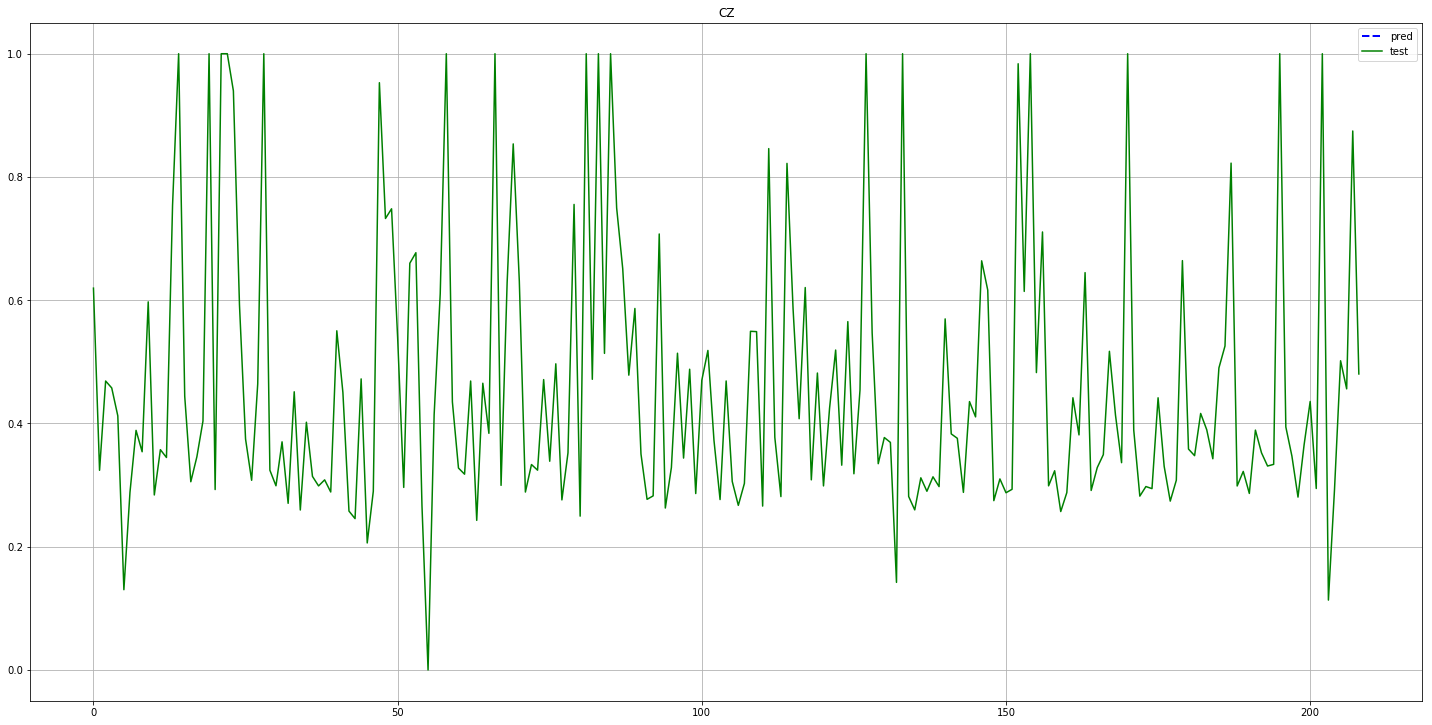

[[ 0.22294995]]
[[-1.13542521]]


In [10]:
# 预测
test = [[ -2.21283262e-02,  -4.22827772e-02,  -1.22634684e-01,  -1.01158189e-01,
   -1.16706481e-01,  -3.61754572e-02]]
#t = ss_x.fit_transform(test)
model_test(test, y_test, "CZ")